# Assignment 1

Lucas Sylvester - s214636 <br>
Lucas Emcken - s214625 <br>
Lila Meflah - s231660 <br>
**Github** \
https://github.com/LucasEmcken/SocialScienceAssignments

**Contribution statement** \
Everybody made all exercises before hand.\
The final assignment was made by combining and \
discussing different approaches to the each exercise.\
\
The git history is not representative as it was made using\
 Deep Note to work in unison on one computer in real time.





In [1]:
import numpy as np
import networkx as nx
import netwulf as nw
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import json 
import random 
import sys
from tqdm import tqdm
import pandas as pd
import ast
import nltk
import pickle
# nltk.download('stopwords')
from wordcloud import WordCloud

# Part 1

### 1. Random Network

In [ ]:
N = 12488
L = 38747
#substituting p out of the formula
p = 2*L/(N*(N-1))
print("p: ", np.round(p, 7))

#average degrees
k = p * (N-1)
print(f"Average degree of random network with this probability: {np.round(k, 3)}")

#generate random graph
def generate_random_g (N,p): 
    G = np.random.uniform(size=(N, N)) < p
    for i in range(N): #remove probabilities to connecto itself, and dont sample probability twice.
        G[i,i:N] = 0
    #append pairs that are true in G
    edges = np.array(np.where(G)).T
    print(f"Number of edges: {len(edges)}")

    #make a graph 
    graph = nx.Graph()
    graph.add_edges_from(edges)
    return graph 

random_network = generate_random_g (N,p)




p:  0.000497
Average degree of random network with this probability: 6.205
Number of edges: 38468


In [ ]:
with open('network_graph.json', 'r') as file:
    reaL_network = json.load(file)
real_network_graph = nx.readwrite.json_graph.node_link_graph(reaL_network)

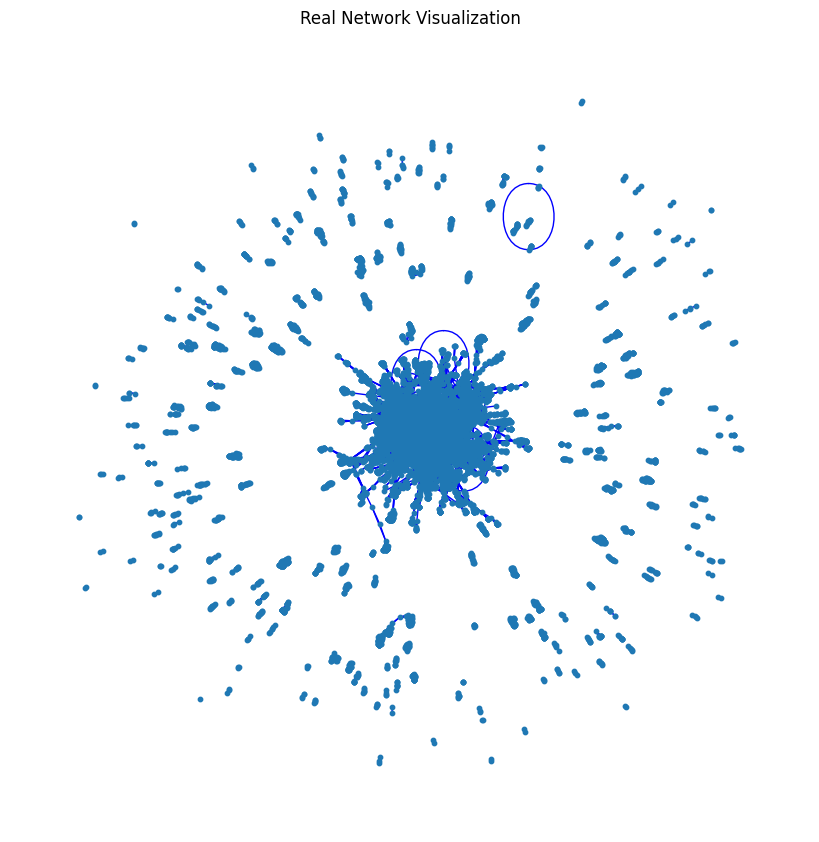

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw(real_network_graph, node_size=10, edge_color="blue", with_labels=False)
plt.title("Real Network Visualization")
plt.show()

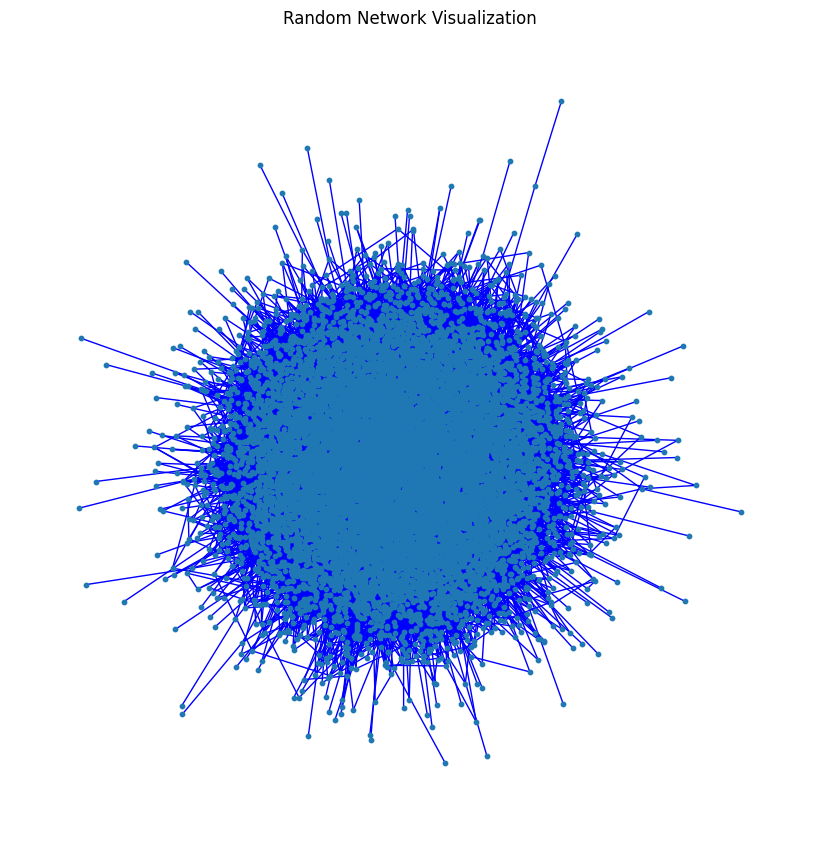

In [ ]:
# Visualize the network
plt.figure(figsize=(8, 8))
nx.draw(random_network, node_size=10, edge_color="blue", with_labels=False)
plt.title("Random Network Visualization")
plt.show()

Answer the following questions (max 200 words in total):


What regime does your random network fall into? Is it above or below the critical threshold?
According to the textbook, what does the network's structure resemble in this regime?

We have an average degree ⟨k⟩ equal to 6.205, thus ⟨k⟩>1, and p=0.000497 and 1/N = 8.0×10−5, thus p>1/N. 

 Our random network falls into the supercritical regime and is above the critical threshold.    (⟨k⟩=1) .This phase marks a significant transition in the network's structure.

During the supercritical regime, a giant component emerges, and as ⟨k⟩ increases, a larger fraction of nodes will belong to it. 

Additionally, numerous isolated components or clusters coexist with the giant component. These smaller components are trees, while the giant component contains loops and cycles.

The network is not fully connected and is not close to reach the average condition of a fully connected network ⟨k⟩>ln(N), ln(N) being 9.432.

Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations

In a random network generated with the Erdős–Rényi model, the distribution of network features is more uniform. For example, it tends to have a uniform degree distribution, more uniform paths, and a lack of highly connected hubs.In contrast, real-world networks exhibit properties such as clustering, hubs, and variable degree distributions, with a few nodes having a high degree compared to the rest.

These differences are consistent with theoretical expectations because reality is not uniform, and connections are non-random.

### 2. Degree Distribution

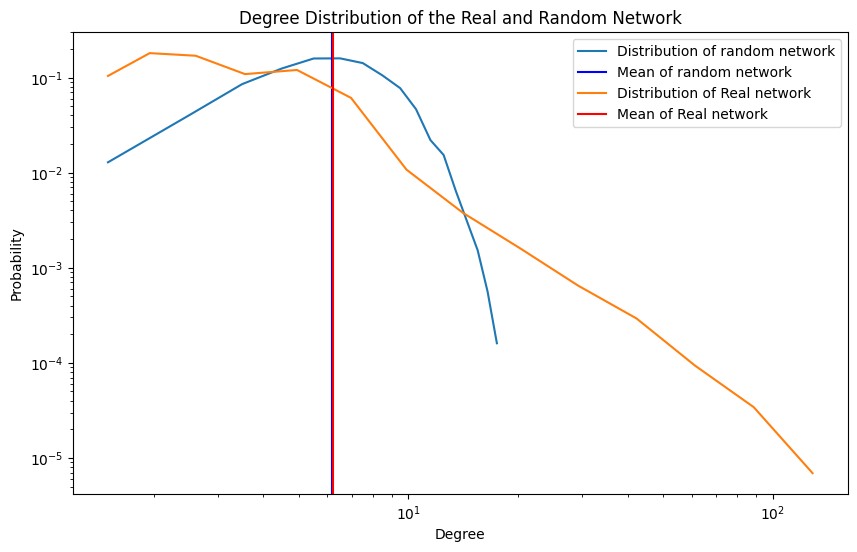

In [ ]:
# compute the distribution of degree Random 
def compute_degree_distribution(network, log=False):
    # Extract the degree sequence
    degrees = [degree for node, degree in network.degree()]
    
    # Compute the histogram of the degree distribution
    max_degree = max(degrees)
    #choose if bins are on a log scale.
    if log:
        bins = np.geomspace(1, max_degree + 2,15)
    else:
        bins = np.arange(1, max_degree + 2)
    hist, edges = np.histogram(degrees, bins=bins, density=True)
    
    return hist, edges, degrees

#compute the 
def plot_degree_distribution(hist, edges, degrees, title="Degree Distribution", name = "random", col="b"):
    # Plot the degree distribution
    #plt.bar(edges[:-1] + 0.5, hist, width=0.8, alpha=0.7)
    plt.loglog(edges[:-1] + 0.5, hist, label = "Distribution of "+name+" network")
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Probability")

    plt.axvline(x = np.mean(degrees), color=col, label = 'Mean of '+name+' network')
    plt.legend()
    #plt.savefig("img/"+title+".png")
    


plt.figure(figsize=(10, 6))
hist, edges, degrees = compute_degree_distribution(random_network)  # Use your network variable here
plot_degree_distribution(hist, edges, degrees, title="Degree Distribution of the Real and Random Network")

hist, edges, degrees = compute_degree_distribution(real_network_graph, log = True)  # Use your network variable here
plot_degree_distribution(hist, edges, degrees, title="Degree Distribution of the Real and Random Network", name="Real", col="r")


plt.legend()
plt.show()

Answer the following questions (max 200 words in total):

Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties. 

In real-world networks characterized by heavy-tailed distributions, the average degree isn't very meaningful. This metric fails to capture the heterogeneity inherent in the degree distribution of such networks. Networks with identical average degrees can exhibit vastly different distributions. The average does not meaningfully represent the typical value or scale of the degree. As seen the real network is not well modelled by the poisson distribution of the random network with same mean. The poisson is better characterized by its typical value as its centered around its mean, but as this is not clearly not the case for the real network.

What differences can you observe between the real and the random distributions? 

If the random network is supposed to represent the real one with the same average degree, it significantly underestimastes the frequency of low degree nodes, aswell as frequency and size of high degree nodes.

The random network' degrees give the typical Poisson prediction, with the given the probability centered around the mean, while the real graph gives heavy tailed distribution more representative of real world scenarios with higher frequency of high and low degree nodes.  

How does the shape of the degree distribution for each network inform us about the network's properties? (max 150 words

In real-world networks, the degree distribution typically follows a power-law, creating a "scale-free" structure. This means a few nodes (hubs) have a high degree of connections, while most nodes have few. 

In random networks, the degree distribution follows a Poisson distribution, where most nodes have a degree close to the average. These networks are more homogeneous in terms of node connectivity and uniformly vulnerable to both random failures and targeted attacks.

# Part 2: Network Analysis in Computational Social Science

## Exercise 1: Mixing Patterns and Assortativity

### 1. Assortativity Coefficient

In [ ]:
def get_country_assortivity(network):
    nodes = network.nodes(data=True)
    links = list(network.edges(data=True))
    # Map node names (or IDs) to countries
    node_country = {node[0]: node[1]['country'] for node in nodes}

    # Initialize variables to calculate assortativity
    e_ii = 0
    sum_aibi = 0
    country_edge_count = {}
    total_links = len(links)

    # Count the links by country
    for link in links:
        source_country = node_country.get(link[0])
        target_country = node_country.get(link[1])
        
        # Increment e_ii if both nodes are from the same country
        if source_country == target_country:
            e_ii += 1
        
        # Update country edge counts for source and target countries
        country_edge_count[source_country] = country_edge_count.get(source_country, 0) + 1
        country_edge_count[target_country] = country_edge_count.get(target_country, 0) + 1

    # Normalize e_ii by the total number of links
    e_ii = e_ii/total_links
    # Calculate sum_aibi
    for country, edge_count in country_edge_count.items():
        ai = edge_count / (total_links*2)
        sum_aibi += ai ** 2
    # Calculate assortativity coefficient
    r = (e_ii - sum_aibi) / (1 - sum_aibi)
    return r

r = get_country_assortivity(real_network_graph)


print(f'Assortativity coefficient: {r}')

Assortativity coefficient: 0.4264491256726258


### 2. Configuration model 

In [ ]:
def double_edge_swap(network, num_swaps=None, verbal=True):

    #Create an exact copy of your original network.
    copy_net = network.copy() 
    edge_list = list(copy_net.edges())
    edge_list = [tuple(sorted(edge)) for edge in edge_list]
    edges = set(edge_list)
    E = len(edges)

    if num_swaps is None:
        num_swaps = E * 10
    successful_swaps = 0
    iter = range(num_swaps)
    if verbal:
        iter = tqdm(range(num_swaps))
    for i in iter:
        not_succes = True
        #dont update the edge list every time only every 10000 or so times.
        if i%100000 == 0:
            edge_list = list(edges)
        while not_succes:
            selected = False 
            attempts = 0 
            while not selected: 
                attempts += 1
                e1 = random.choice(edge_list)
                e2 = random.choice(edge_list)
                # the edgelist is not always up to date, so check if the edges appear the edge set first.
                if e1 != e2 and e1[0] != e2[1] and e1[1] != e2[0] and e1 in edges and e2 in edges:
                    selected = True
            u, v = e1
            x, y = e2
            # Optionally flip the direction of an edge 50% of the time
            if random.random() < 0.5:
                u, v = v, u 
            
            e1_prime = (u, x)
            e2_prime = (v, y)

            e1_prime = tuple(sorted(e1_prime))
            e2_prime = tuple(sorted(e2_prime))

            if e1_prime not in edges and e2_prime not in edges:
                # Perform the swap
                edges.remove(e1)
                edges.remove(e2)
                edges.add(e1_prime)
                edges.add(e2_prime)
                #We dont use time to remove from the edge_list, we will check if relevant edge exists in the set.
                edge_list.append(e1_prime)
                edge_list.append(e2_prime)

                not_succes = False
    new_graph = nx.Graph(list(edges))
    new_graph.update(nodes=copy_net.nodes(data=True))
    return new_graph

    
new_network = double_edge_swap(real_network_graph)

100%|██████████| 387470/387470 [00:09<00:00, 39705.63it/s]


In [ ]:
def calculate_node_degrees(edges):

    degrees = {}
    for edge in edges:
        
        u, v = edge
        degrees[u] = degrees.get(u, 0) + 1
        degrees[v] = degrees.get(v, 0) + 1

    return degrees

def compare_degrees(original_edges, randomized_edges):

    original_degrees = calculate_node_degrees(original_edges)
    randomized_degrees = calculate_node_degrees(randomized_edges)
    
    # Check if the degrees match between the two networks
    return original_degrees == randomized_degrees

print(f"Do the networks match: {compare_degrees ( new_network.edges, real_network_graph.edges)}")

Do the networks match: True


### Part 3 : Analyzing Assortativity in Random Networks

In [ ]:
#get 100 double edge swapped graphs

try:
    with open('randomized_graphs.dat', 'rb') as f:
        randomized_graphs = pickle.load(f)
except:
    #randomized_graphs = []
    for i in tqdm(range(100)): 
        random_graph = double_edge_swap(real_network_graph, verbal=False)
        randomized_graphs.append(random_graph)
    with open('randomized_graphs.dat', 'wb') as f:
      pickle.dump(randomized_graphs, f)

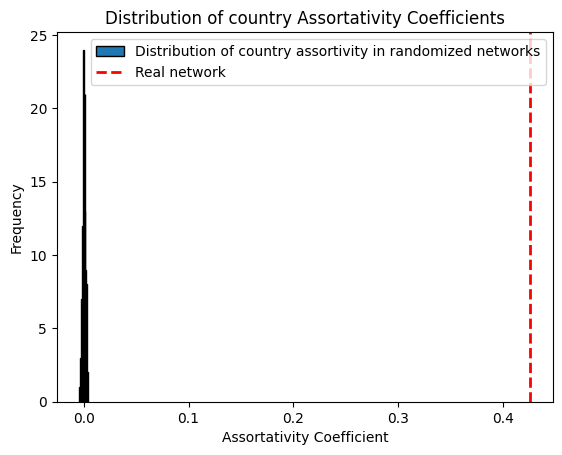

In [ ]:
coefficient_r = []
for random_graph in randomized_graphs: 
    coefficient_r.append(get_country_assortivity(random_graph))
plt.hist(coefficient_r, bins=10, edgecolor='black', label="Distribution of country assortivity in randomized networks")
plt.axvline(r, color='r', linestyle='dashed', linewidth=2, label="Real network")
plt.legend()
plt.title('Distribution of country Assortativity Coefficients')
plt.xlabel('Assortativity Coefficient')
plt.ylabel('Frequency')
plt.show()

Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.

Comparing the country assortativity of the real network with the distribution of the randomized networks it clearly falls out of the expected distribution. Showing a clear tendency that nodes connect more likely with nodes of the same country, than the network would if they were to connect randomly.

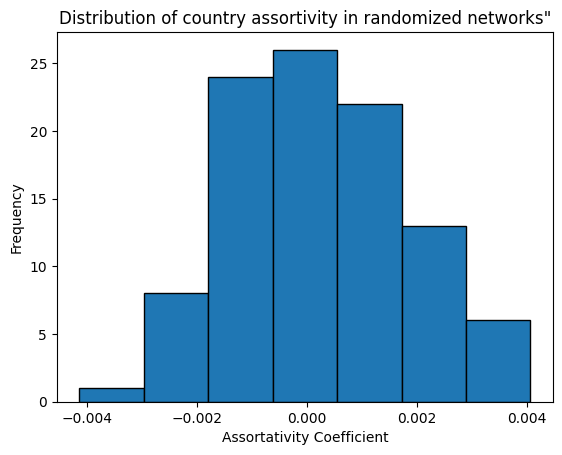

In [ ]:
plt.hist(coefficient_r, bins=7, edgecolor='black')
plt.title('Distribution of country assortivity in randomized networks"')
plt.xlabel('Assortativity Coefficient')
plt.ylabel('Frequency')
plt.show()

### Part 4: Assortativity by Degree

In [ ]:
def get_deg_assortativity(G):
    # Calculate the degrees of each node
    degrees = [degree for node, degree in G.degree()]
    
    M = len(list(G.edges()))
    product_average = sum([G.degree(u) * G.degree(v) for u, v in G.edges()])/M
    edge_degree_average = (sum([(G.degree(u) + G.degree(v))/2 for u, v in G.edges()])/M)
    edge_sq_degree_average = sum([(G.degree(u)**2 + G.degree(v)**2)/2 for u, v in G.edges()])/M

    r = (product_average-edge_degree_average**2)/(edge_sq_degree_average-edge_degree_average**2)

    return r

deg_assortativity = get_deg_assortativity(real_network_graph)
print(f"The degree correlation coefficient of our network r is {deg_assortativity}")

The degree correlation coefficient of our network r is -0.10733255393311837


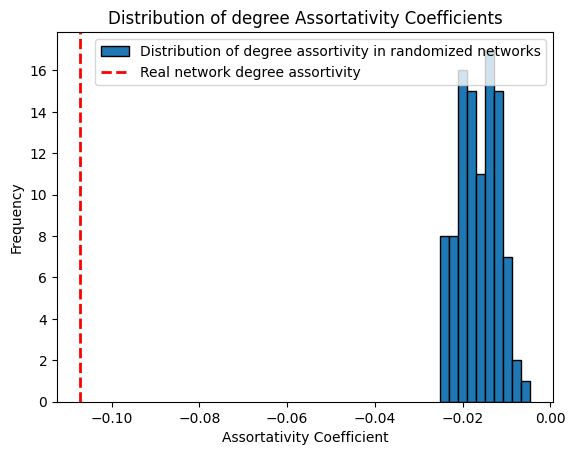

In [ ]:
degree_r = []
for random_graph in randomized_graphs: 
    degree_r.append(get_deg_assortativity(random_graph))

plt.hist(degree_r, bins=10, edgecolor='black', label="Distribution of degree assortivity in randomized networks")
plt.axvline(deg_assortativity, color='r', linestyle='dashed', linewidth=2, label="Real network degree assortivity")
plt.legend()
plt.title('Distribution of degree Assortativity Coefficients')
plt.xlabel('Assortativity Coefficient')
plt.ylabel('Frequency')
plt.show()


Compare your network's degree assortativity against that of 100 random networks generated via the configuration model. Analyze whether your network shows a tendency for high-degree scientists to connect with other high-degree scientists and vice versa.

Comparing with the randomized network the degree assortativity is significantly lower than random. As r < 0, we can say that the network is slightly disassortative. Thus, nodes of low degree slightly tend to connect with those of high degree and vice-versa. 

### Part 5: Reflection questions

(max 250 words for the 3 questions)

Assortativity by degree. Were the results of the degree assortativity in line with your expectations? Why or why not?

The degree assortativity describes the tendency of nodes to connect with other nodes that have a similar degree. If the assortativity is negative, it indicates that high degree nodes and hubs tend to connect with low-degree nodes. The results of the degree assortativity align well with our expectations. We dont expect a strong disassortativity, but it makes sense that are tendencies of low degree, being slightly favored to initially connect with higher degree hubs, as people in the scientific research often initially work with more experienced individuals and mentors.

 Edge flipping. In the process of implementing the configuration model, you were instructed to flip the edges (e.g., changing e_1 from (u,v) to (v,u)) 50% of the time. Why do you think this step is included?

We aim to ensure that the final result is not biased. Specifically, we don't want the structure of our network to be influenced by any pre-existing patterns arising from the data collection process. If the edges are written with sorted nodes (which we also did to more easily keep track of edges in a set), there arises a bias of certain nodes being more or less likely to be swapped. During the process groups of nodes may be more or less likely to be connected together by the swapping, creating unwanted tendencies.

Distribution of assortativity in random networks. Describe the distribution of degree assortativity values you observed for the random networks. Was the distribution pattern expected? Discuss how the nature of random network generation (specifically, the configuration model and edge flipping) might influence this distribution and whether it aligns with theoretical expectations.

The distribution is symmetrical but is slightly biased towards disassortativity. Initially we might assume that due to randomization, the distribution should just be centered around 0. But since we are edge flipping and not completely randomizing the network, the preserved degree of the nodes might also preserve some of the disassortativity. As the number of high and low degree nodes remain identical, there might be slight bias towards the degree structure remaining identical as well.

### Exercise 2: Central nodes

Find the 5 most central scientists according to the closeness centrality. 

In [ ]:
cc = nx.closeness_centrality(real_network_graph)
ec = nx.eigenvector_centrality(real_network_graph)

In [ ]:
cc_sorted = dict(sorted(cc.items(), key=lambda item: item[1]))
list(cc.keys())[-5:]

['https://openalex.org/A5037726482',
 'https://openalex.org/A5084146095',
 'https://openalex.org/A5067839450',
 'https://openalex.org/A5055560312',
 'https://openalex.org/A5032257766']

1. Beatrice Bonami

2. Giovanna Segre

3. Margarita Chudnovskaya

4. Paweł Kołodziejski

5. Dymitr Ruta

What role do you imagine scientists with high closeness centrality play?

nodes with a high closeness centrality can quickly interact with all other nodes, as such scientists with high closeness centrality likely play key roles as they have quick access to resources or collaborations, which can promote interdisciplinary research and and collaborations across different research domains.

Find the 5 most central scientists according to eigenvector centrality.

In [ ]:
ec_sorted = dict(sorted(cc.items(), key=lambda item: item[1]))
list(cc.keys())[-5:]

['https://openalex.org/A5037726482',
 'https://openalex.org/A5084146095',
 'https://openalex.org/A5067839450',
 'https://openalex.org/A5055560312',
 'https://openalex.org/A5032257766']

The most central scientists are the same for closeness centrality and eigenvector centrality

Plot the closeness centrality of nodes vs their degree. 

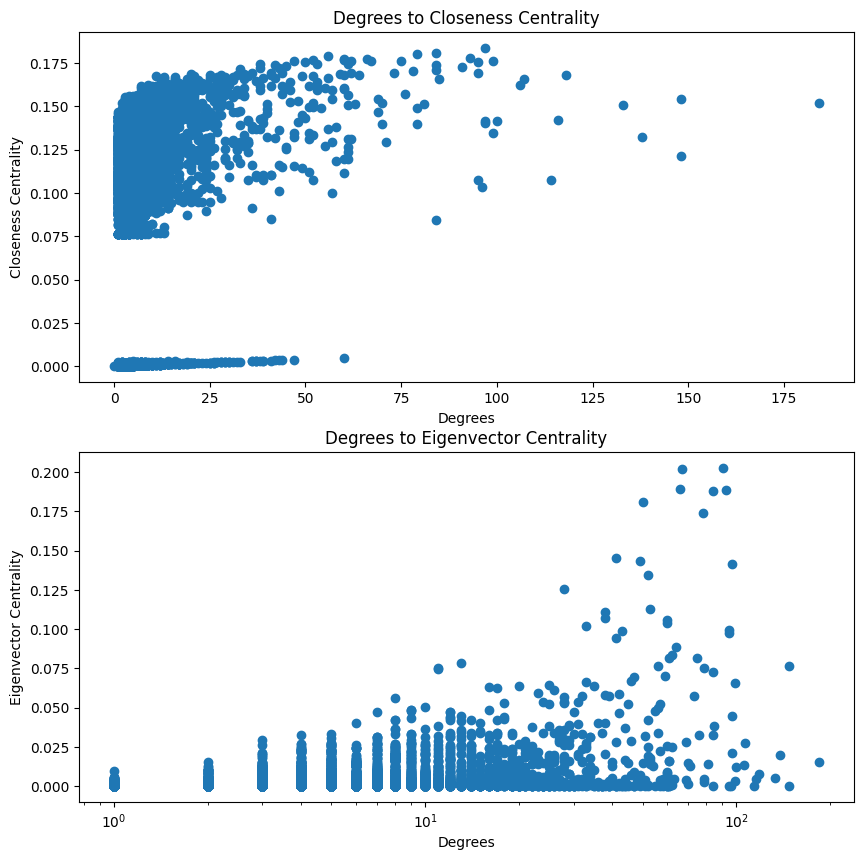

In [ ]:
degrees = [val for (node, val) in real_network_graph.degree()]

cc_val = list(cc.values())
ec_val = list(ec.values())
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].scatter(degrees, cc_val)
ax[0].set_title('Degrees to Closeness Centrality')
ax[0].set_xlabel('Degrees')
ax[0].set_ylabel('Closeness Centrality')
#ax[0].set_xscale('log')
#ax[0].set_yscale('log')

ax[1].scatter(degrees, ec_val)
ax[1].set_title('Degrees to Eigenvector Centrality')
ax[1].set_xlabel('Degrees')
ax[1].set_ylabel('Eigenvector Centrality')
ax[1].set_xscale('log')
#ax[1].set_yscale('log')

plt.show()

Is there a correlation between the two? Did you expect that? Why?

For the closeness centrality, we see a trend where scientists of a higher degree also have a higher centrality score. This is expected, since more connected scientists are expected to be more central within the network. The same trend is not so clear in the eigenvector centrality, however after log transforming the degrees, the trend also appears there.

Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?

There is a clear difference in how the plots looks, this is because the eigenvector centrality weights notes higher if they are connected to other important nodes, where closeness centrality weights based on connections to all other nodes.

# Part 3 - Words that characterise Computational Social Science communities

### 1. TF-IDF and the Computational Social Science communities

Part 1: TF-IDF

TF stands for term frequency, it measures how often a term appears in a document measured by (Total times term appears in the document)/(Total amount of terms in the document)

IDF stands for inverse document frequency. It measures how frequently terms appear in documents, and weights terms that appear frequently in all the documents in the corpus lower.

The TF-IDF is the product of TF and IDF, and weighs how important a document is relative to the entire corpus, useful for when you are searching for specific documents in a library, or websites like when googling.

In [ ]:
#find communities in the network
communities = nx.algorithms.community.greedy_modularity_communities(real_network_graph)

# Create a mapping of authors to communities
author_community_map = {author: i for i, community in enumerate(communities) for author in community}

papers_df = pd.read_csv('full_df_unique.csv')

papers_df.dropna(subset=['abstract_inverted_index'], inplace=True)

papers_df['author_ids'] = papers_df['author_ids'].apply(lambda x: ast.literal_eval(x))
papers_df['abstract_inverted_index'] = papers_df['abstract_inverted_index'].apply(ast.literal_eval)

# Assign communities to papers using the map function
papers_df['community'] = papers_df['author_ids'].apply(lambda authors: [author_community_map.get(author) for author in authors if author in author_community_map])

# Flatten the list of communities in each row
papers_df = papers_df.explode('community')

#drop duplicates
papers_df.drop_duplicates(subset=['id'], inplace=True)

papers_df.head()

id  publication_year  cited_by_count  \
0  https://openalex.org/W2157082398            2008.0          1880.0   
1  https://openalex.org/W2095072199            2005.0           717.0   
2  https://openalex.org/W2102017123            2015.0           395.0   
3  https://openalex.org/W2513567506            2017.0           360.0   
4  https://openalex.org/W2074562205            2014.0           181.0   

                                          author_ids  \
0  [https://openalex.org/A5014647140, https://ope...   
1                 [https://openalex.org/A5014647140]   
2  [https://openalex.org/A5014647140, https://ope...   
3  [https://openalex.org/A5072266097, https://ope...   
4  [https://openalex.org/A5078066191, https://ope...   

                                               title  \
0  Hierarchical structure and the prediction of m...   
1      Finding local community structure in networks   
2  Systematic inequality and hierarchy in faculty...   
3  The ground truth about metadata and community ...   
4   Power-law distributions in binned empirical data   

                             abstract_inverted_index community  
0  {'Networks': [0], 'have': [1], 'in': [2, 16, 3...         1  
1  {'Although': [0], 'the': [1, 18, 26, 46, 57, 7...         1  
2  {'The': [0], 'faculty': [1, 26, 48, 66, 76, 11...         1  
3  {'Across': [0], 'many': [1], 'scientific': [2]...         1  
4  {'Many': [0], 'man-made': [1], 'and': [2, 13, ...         1

In [ ]:
#compute community size
community_sizes = papers_df['community'].value_counts()

#identify top 5 communities by size
top_communities = community_sizes.nlargest(5)

additional_stopwords = ['may', 'also','often', 'within', 'use', 'social', 'we', 'the', 'in','study','data','model']

#calculate the term frequency of each community
def calculate_term_frequency(community):
    # Extract the abstracts of papers in the community
    abstracts = papers_df[papers_df['community'] == community]['abstract_inverted_index']
    
    # Initialize a dictionary to store term frequencies and positions
    term_frequency = {}
    
    # Iterate through each abstract
    for abstract in abstracts:
        # Iterate through each term in the abstract
        for term, positions in abstract.items():
            # If term already exists in term_frequency, update positions
            if term in term_frequency:
                term_frequency[term].extend(positions)
            # If term is new, add it to term_frequency
            else:
                term_frequency[term] = positions
    
    # Convert the positions to a series for easier manipulation
    term_frequency_series = pd.Series(term_frequency)
    
    # Count occurrences of each term
    term_frequency_count = term_frequency_series.apply(lambda x: len(x))
    
    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    stop_words.update(additional_stopwords)
    term_frequency_count = term_frequency_count[~term_frequency_count.index.str.lower().isin(stop_words)]
    
    # Convert index to lowercase
    term_frequency_count.index = term_frequency_count.index.str.lower()
    
    return term_frequency_count

#compute the IDF of each term
def calculate_inverse_document_frequency(community):
    # Extract the abstracts of papers in the community
    abstracts = papers_df[papers_df['community'] == community]['abstract_inverted_index']
    
    # Initialize a dictionary to store document frequencies
    document_frequency = {}
    
    # Iterate through each abstract
    for abstract in abstracts:
        # Iterate through each term in the abstract
        for term in abstract.keys():
            # If term already exists in document_frequency, increment count
            if term in document_frequency:
                document_frequency[term] += 1
            # If term is new, add it to document_frequency
            else:
                document_frequency[term] = 1
    
    # Convert document frequency dictionary to Series
    document_frequency_series = pd.Series(document_frequency)
    
    # Compute inverse document frequency
    inverse_document_frequency = 1 / np.log(1 + document_frequency_series)
    
    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    stop_words.update(additional_stopwords)
    inverse_document_frequency = inverse_document_frequency[~inverse_document_frequency.index.str.lower().isin(stop_words)]
    
    # Convert index to lowercase
    inverse_document_frequency.index = inverse_document_frequency.index.str.lower()
    
    return inverse_document_frequency


#find the top 10 terms in the top 9 communities
top_9_c = community_sizes.nlargest(9)
top_9_tfidf = {}
for community in top_9_c.index:
    term_frequency = calculate_term_frequency(community)
    inverse_document_frequency = calculate_inverse_document_frequency(community)
    print(f"Community {community}:")
    # print(term_frequency.nlargest(10))
    
    #print the top TF-IDF terms
    tf_idf = term_frequency * inverse_document_frequency
    tf_idf = tf_idf[~tf_idf.index.duplicated()]
    top_9_tfidf[community] = tf_idf
    print(term_frequency.nlargest(10))
    print(tf_idf.nlargest(10))
    
    print()

Community 0:
network        678
information    648
different      641
show           615
results        517
using          487
human          464
find           449
networks       444
two            442
dtype: int64
network        114.341818
information    109.233516
different      105.231882
show            98.928578
results         84.938251
using           82.167383
human           81.302091
networks        80.069575
find            76.209626
time            75.917875
dtype: float64

Community 1:
network        230
find           228
show           204
online         197
information    193
media          180
results        170
different      167
research       163
users          161
dtype: int64
network        48.562154
find           44.653826
online         41.992196
media          40.846714
show           40.822761
information    40.600892
users          35.958876
different      35.005458
results        34.604507
research       34.228065
dtype: float64

Community 2:
network      

Describe similarities and differences between the communities.Why aren't the TFs not necessarily a good description of the communities?Next, we calculate IDF for every word.What base logarithm did you use? Is that important?

There are many similarities in the top 10 words, words such as data, model, research appear frequently in the TFs and the TF-IDFs. Some differences in the communities can also be seen. Some differences in the communities also become apparent, some focus on road design and safety, others on media and misinformation.

TFs exclusively are not going to be the best description of the communities since some terms may have a frequency bias, where they appear frequently but may be unrelated to the subject. Additionally, a longer abstract is more likely to have the same subject word appear more frequently.

In the code, we used the natural logarithm. The choice of logarithm can impact the size of the IDF, but they should still have the same ordering in importance. It can have an impact on document retrieval, where a term is weighted heavier due to the choice of logarithm.

### 2. The Wordcloud

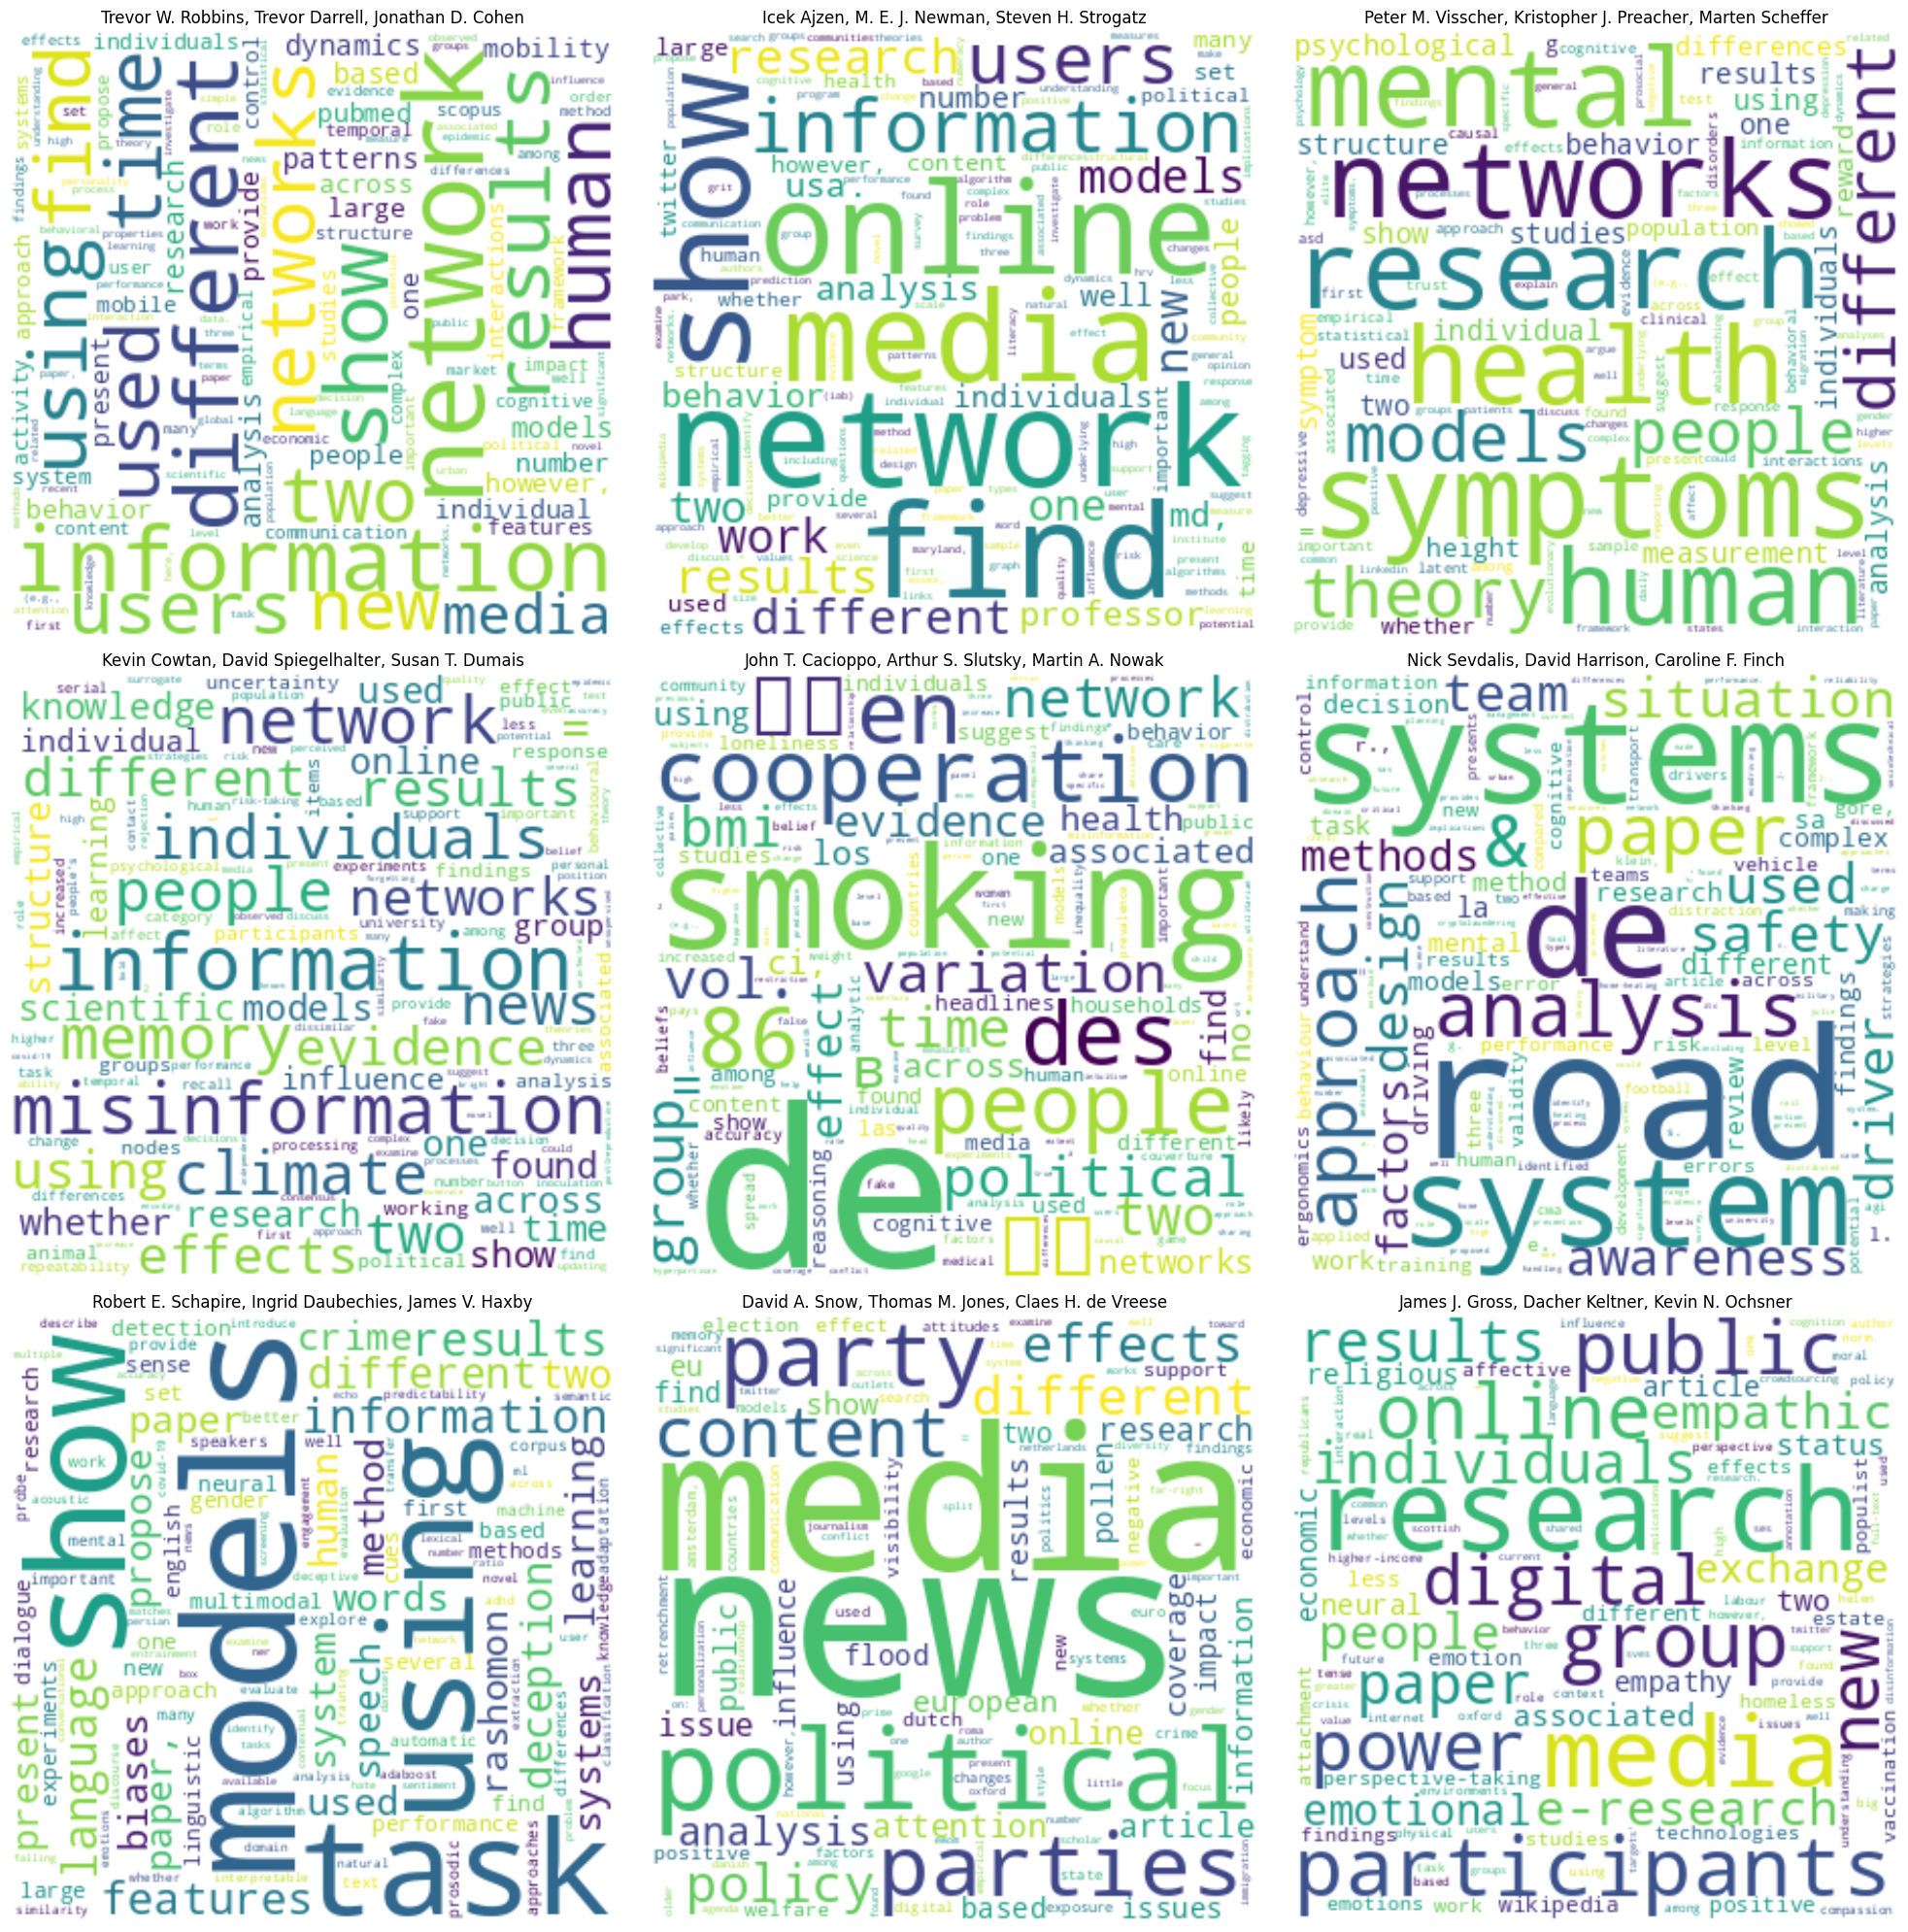

In [ ]:
#load authors info
authors_df = pd.read_csv('final_authors.csv')

#add https://openalex.org/ to the author ids
authors_df['author_id'] = authors_df['id'].apply(lambda x: 'https://openalex.org/' + str(x))
#add the community to the authors
authors_df['community'] = authors_df['id'].apply(lambda x: author_community_map.get(x))

for author in authors_df['id']:
    for id, community in enumerate(communities):

        if author in list(community):
            authors_df.loc[authors_df['id'] == author, 'community'] = id
            break
#remove authors with more than 1000 works_count
authors_df = authors_df[authors_df['works_count'] < 1000]

import wordcloud

#get the TF-IDF for the top 16 communities
top_16_c = community_sizes.nlargest(16)
top_16_tfidf = {}
for community in top_16_c.index:
    term_frequency = calculate_term_frequency(community)
    inverse_document_frequency = calculate_inverse_document_frequency(community)
    
    # Compute the TF-IDF
    tf_idf = term_frequency * inverse_document_frequency
    top_16_tfidf[community] = tf_idf
    

# Create a word cloud for each community
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for i, (community, tf_idf) in enumerate(top_9_tfidf.items()):
    ax = axes[i // 3, i % 3]
    wc = wordcloud.WordCloud(width=300, height=300, background_color='white').generate_from_frequencies(tf_idf)
    ax.imshow(wc, interpolation='bilinear')
    #set the title of the word cloud as the 3 top authors by cited_by_count in the community
    top_3_authors = authors_df[authors_df['community'] == community].nlargest(3, 'cited_by_count')
    
    #get the display names
    top_3_authors = top_3_authors['display_name'].tolist()
    
    ax.set_title(', '.join(top_3_authors))
    
    
    ax.axis('off')
plt.tight_layout()
plt.show()


Comment on your results. What can you conclude on the different sub-communities in Computational Social Science?Look up online the top author in each community. In light of your search, do your results make sense?

Trevor W. Robbins studies behavioral psychology in drug addiction, and within his community, words like human, dynamics, patterns and behavior have a high scoring

David A. snow studies the research of social protests and movements, and similarly the words with a high scoring are media, news, political and parties.

From the word clouds we can also see potential future collaborations, for example it might be fruitful for Trevor Robbins to collaborate with researchers from the middle wordcloud, where words like health and smoking are scored high, aligning with his research into drug addiction

### 3. Computational Social Science

Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science.
In light of your data-driven analysis, has your understanding of the field changed? How? (max 150 words)

Computational Social Science uses data driven approaches to model social behavior. It combines computer science, statistics and social science to utilize methods like network analysis to explore large social systems quantitatively, which can valuable offer insights into social systems and improve our understanding of complex social processes and phenomena.

Our understanding of the subject has evolved in terms of the subjects being studied, as well as how they are being studied. Our understanding has mainly evolved in terms of what is capable to be analyzed, using methods like network analysis to view connections, degree distributions, assortativity and centrality measures to gain insight into properties of the network.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f5078c10-8674-41d7-afe9-d555a2c8d1b9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>